In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
# load an OGC GeoPackage containing the DC Crime 2017 point layer 
map_df = gpd.read_file("Crime_2017.gpkg", layer = 'Crime_2017')

In [5]:
# geometry column shows that this is a GEOdataframe
map_df.head()

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,BLOCK_GROU,CENSUS_TRA,VOTING_PRE,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,geometry
0,17099955,2017-06-12T20:21:57.000Z,EVENING,OTHERS,THEFT/OTHER,900 - 999 BLOCK OF H STREET NW,397833,136884,2,2C,...,005800 1,005800,Precinct 129,38.899805,-77.024982,DOWNTOWN,2017-06-12T17:07:54.000Z,None,205406974,POINT (-77.02498381736048 38.89981322477427)
1,17099960,2017-06-12T18:10:26.000Z,EVENING,OTHERS,THEFT/OTHER,3600 - 3699 BLOCK OF O STREET NW,393843,137761,2,2E,...,000202 4,000202,Precinct 6,38.907687,-77.070987,None,2017-06-10T12:00:53.000Z,2017-06-12T14:30:29.000Z,205406975,POINT (-77.07098904595119 38.90769465590191)
2,17099975,2017-06-12T19:10:38.000Z,EVENING,OTHERS,ROBBERY,1400 - 1499 BLOCK OF 21ST STREET NW,395955,137916,2,2B,...,005500 4,005500,Precinct 14,38.909095,-77.046637,None,2017-06-12T16:57:28.000Z,2017-06-12T19:10:37.000Z,205406976,POINT (-77.04663978712287 38.90910320741903)
3,17099979,2017-06-12T20:00:47.000Z,EVENING,OTHERS,ROBBERY,6000 - 6129 BLOCK OF KANSAS AVENUE NW,399159,143979,4,4B,...,001902 2,001902,Precinct 64,38.963722,-77.009704,None,2017-06-12T17:50:26.000Z,2017-06-12T18:24:29.000Z,205406977,POINT (-77.00970616895896 38.96372943312385)
4,17099985,2017-06-12T18:31:04.000Z,EVENING,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF PENNSYLVANIA AVENUE NW,397496,136376,2,2C,...,006202 1,006202,Precinct 129,38.895228,-77.028865,DOWNTOWN,2017-06-10T18:27:34.000Z,2017-06-10T18:40:00.000Z,205406978,POINT (-77.02886695677205 38.89523608044212)


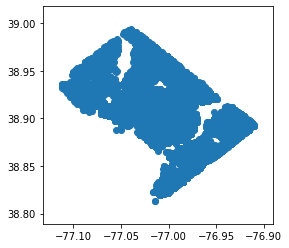

In [6]:
#preview what our map looks like with no data in it
map_df.plot()

In [7]:
max(map_df['WARD'])

'8'

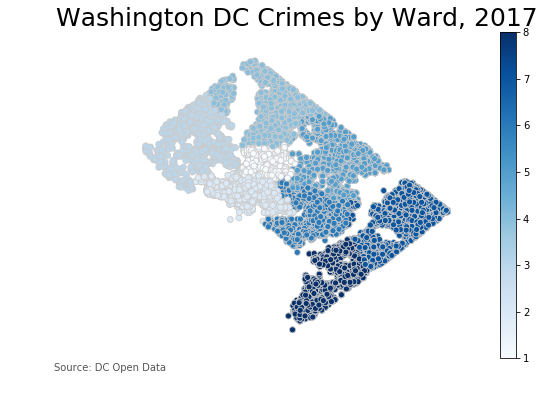

In [8]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'WARD'

# set the range for the choropleth
vmin, vmax = 1, 8

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
map_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Washington DC Crimes by Ward, 2017', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: DC Open Data',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)